In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
real= pd.read_csv('True.csv')
fake= pd.read_csv('Fake.csv')


In [6]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake['label'] = 0
real['label'] = 1

In [9]:
data = pd.concat([fake, real], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
print("Dataset shape:", data.shape)


Dataset shape: (44898, 5)


In [12]:
print(data.head())


                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  


In [13]:

print(data['label'].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


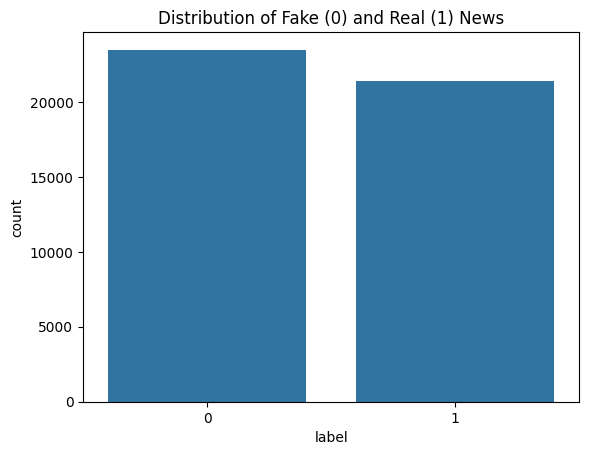

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data)
plt.title("Distribution of Fake (0) and Real (1) News")
plt.show()

In [15]:
import re
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text


data['text'] = data['text'].astype(str).apply(clean_text)

In [16]:
X = data['text']
y = data['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [19]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_tfidf)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9841870824053452

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



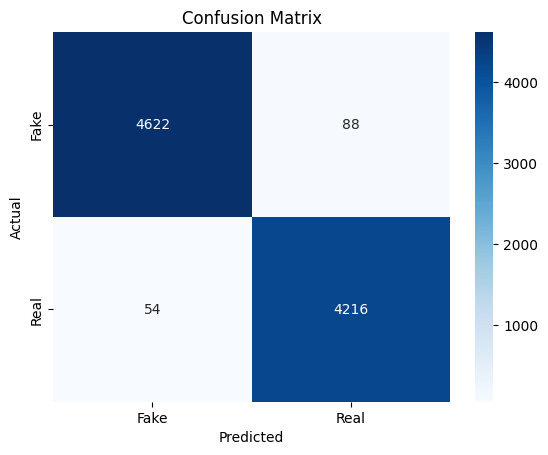

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
def predict_news(text):
    text = clean_text(text)
    vect_text = tfidf.transform([text])
    pred = model.predict(vect_text)[0]
    return "Real News" if pred == 1 else "Fake News"



In [26]:
sample_text = "Breaking news: Scientists discover water on Mars!"
print(sample_text)
print("Prediction:", predict_news(sample_text))

Breaking news: Scientists discover water on Mars!
Prediction: Fake News


In [31]:
sample_texts = [
    "NASA’s James Webb Telescope captures the first detailed image of an exoplanet atmosphere.",
    "Scientists claim that drinking soda every day can make you live 50 years longer."
]

for text in sample_texts:
    print("news: ",text)
    print("Prediction:", predict_news(text))
    print("--------------------------------------------------------------------------------------------------")

news:  NASA’s James Webb Telescope captures the first detailed image of an exoplanet atmosphere.
Prediction: Fake News
--------------------------------------------------------------------------------------------------
news:  Scientists claim that drinking soda every day can make you live 50 years longer.
Prediction: Fake News
--------------------------------------------------------------------------------------------------
